In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Show all columns when printing DataFrames
pd.set_option('display.max_columns', None)

# Use a clean visual style for all plots
sns.set(style="whitegrid")

<h3>Load the Dataset</h3>

In [2]:
# Read the raw heart disease dataset
df = pd.read_csv("../data/raw/heart.csv")

# Preview the first 5 rows to understand the structure
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<h3>Basic Dataset Information</h3>

In [3]:
# Shows column types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Statistical summary of all features (numeric + categorical)
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h3>Missing Values Analysis</h3>

In [5]:
# Count missing values in each column (sorted from highest to lowest)
missing = df.isnull().sum().sort_values(ascending=False)
missing


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

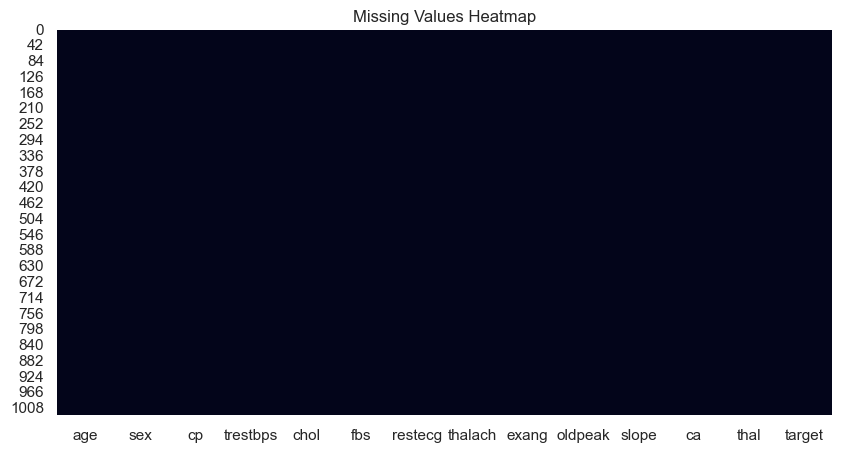

In [7]:
# Visual heatmap showing where missing values appear
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


<h3>Target Variable Distribution</h3>

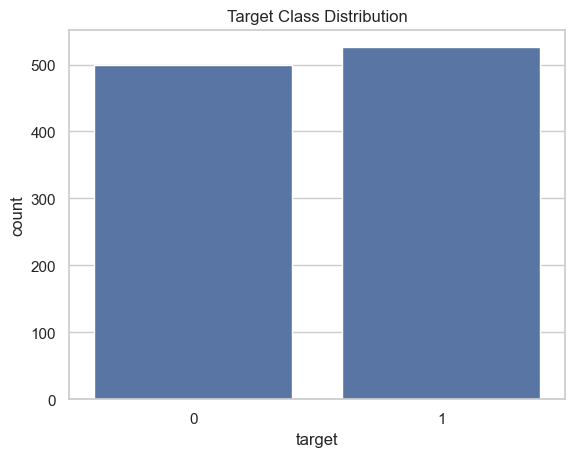

In [10]:
# Count how many "Yes" vs "No" for heart disease
df['target'].value_counts()

# Visualize class distribution (important to check imbalance)
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()

<h3>Distribution of Numerical Features</h3>

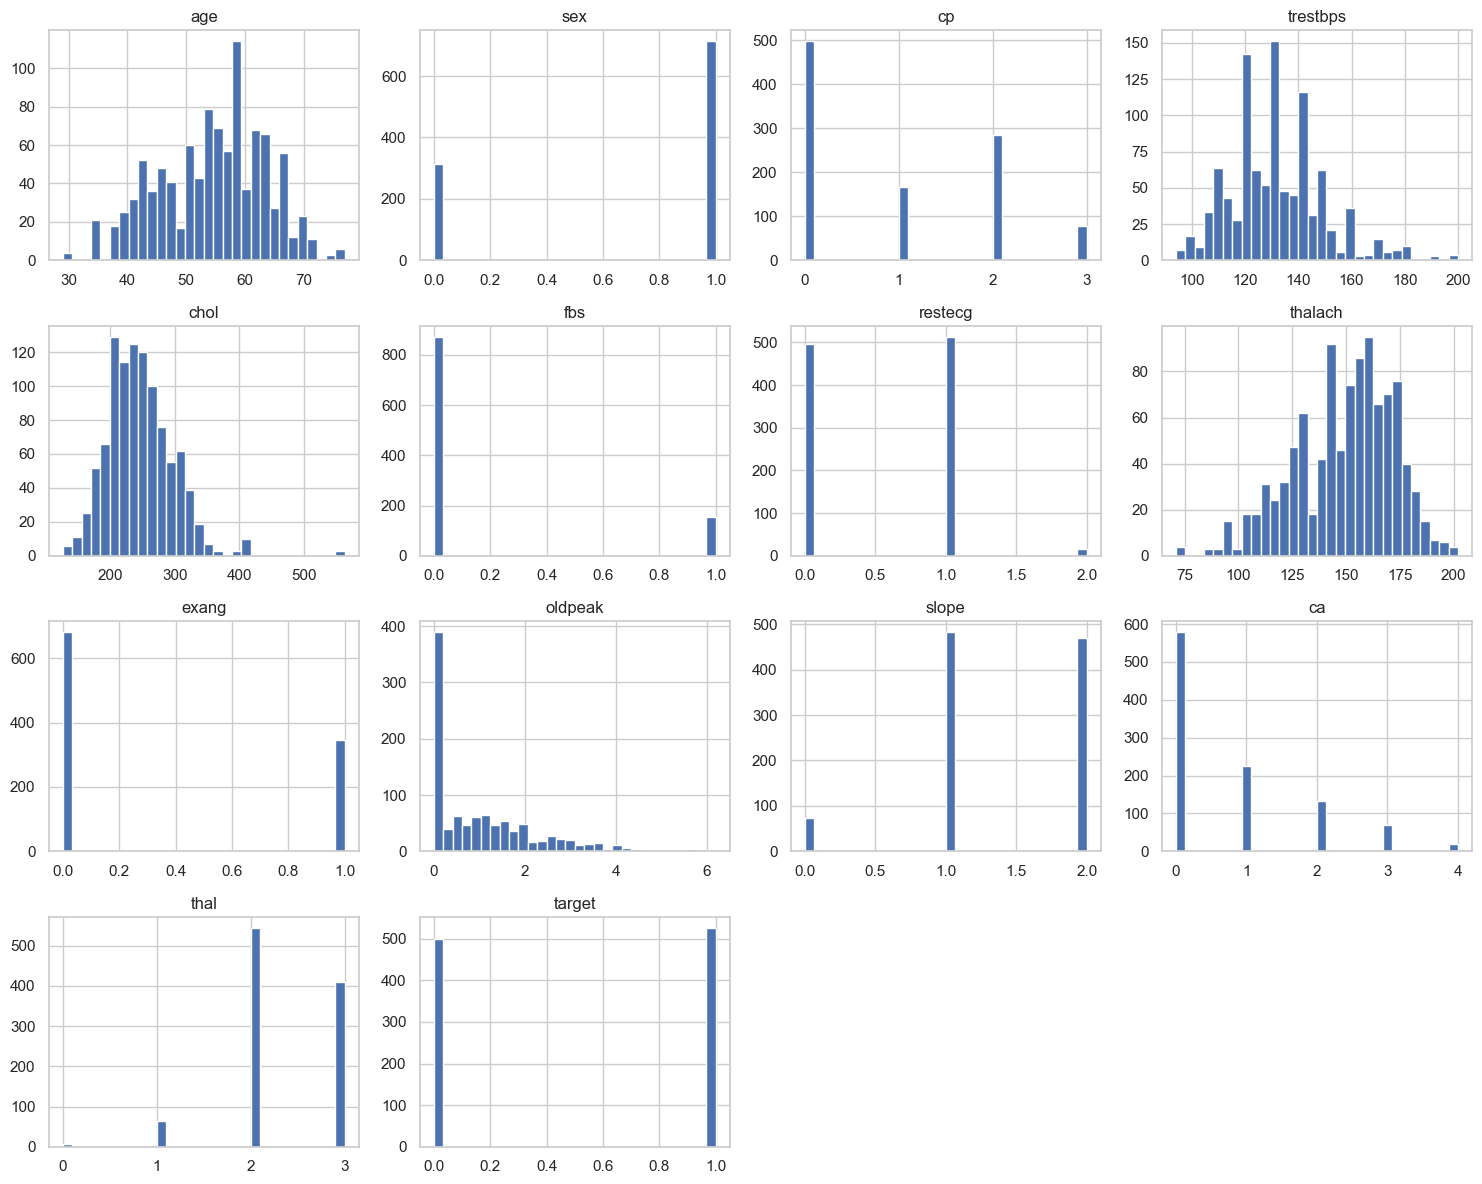

In [11]:
# Select numerical columns (int and float types)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical features
df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

<h3>Distribution of Categorical Features</h3>

In [12]:
# Select categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot a count chart for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

<h3>Correlation Analysis</h3>

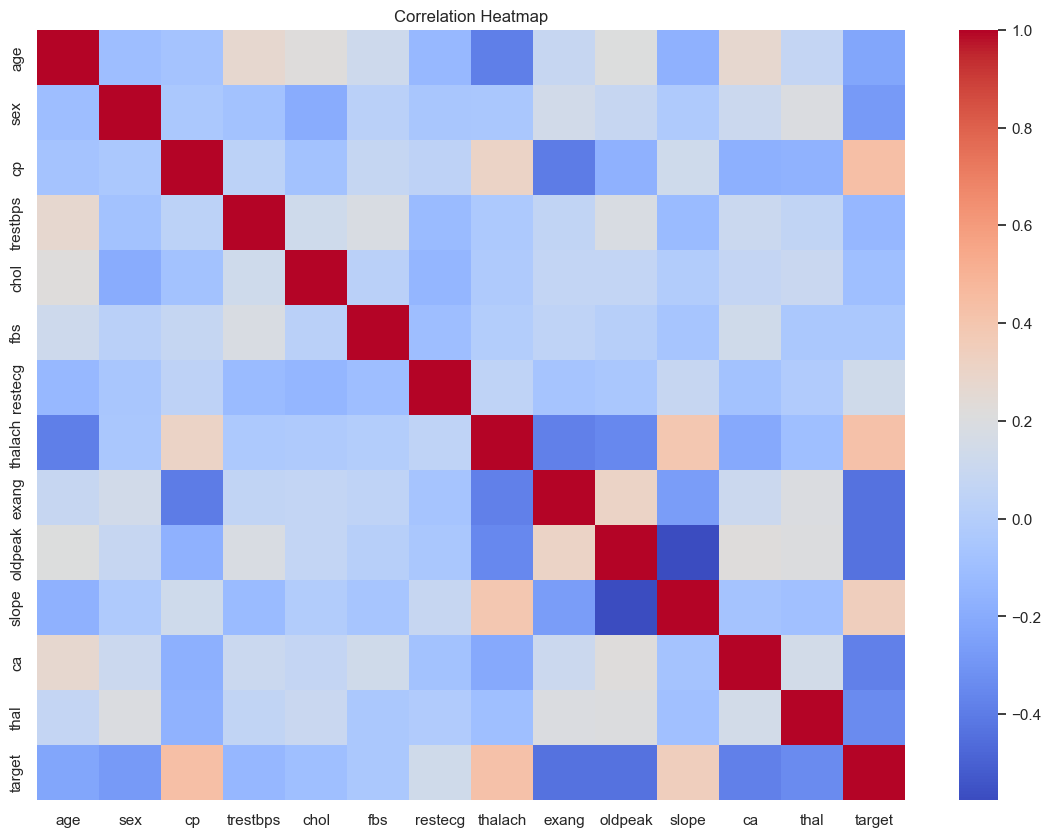

In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(14,10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<h3>Pairplot (Multivariate Relationships)</h3>

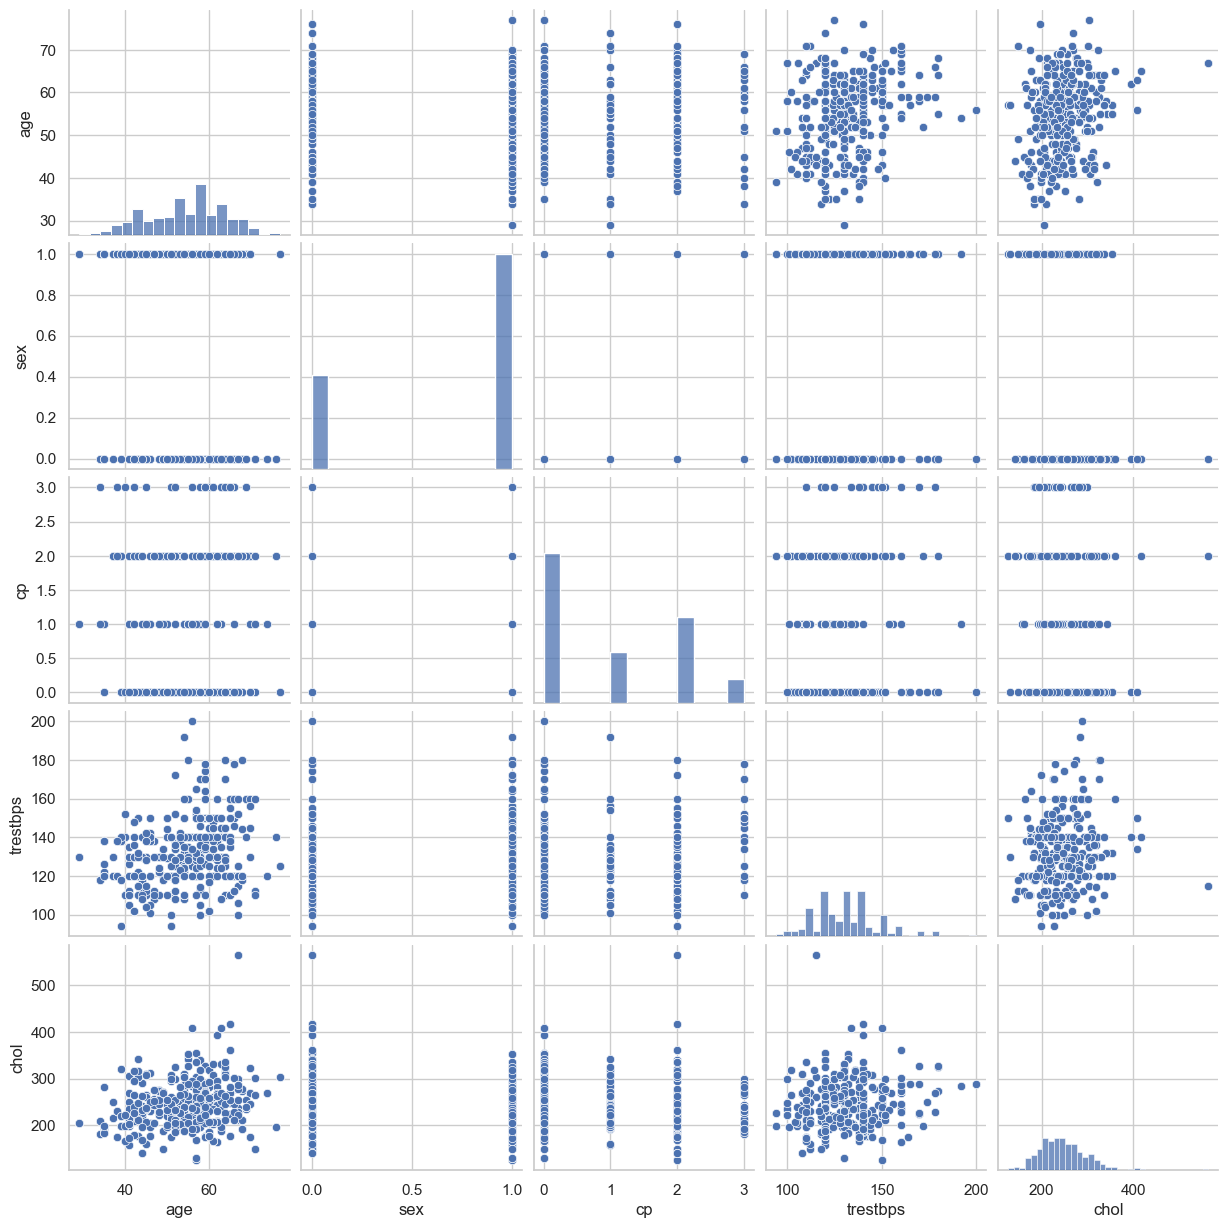

In [14]:
# Visualize relationships between a subset of numerical features
sns.pairplot(df[numeric_cols[:5]])  # first five numerical features
plt.show()

<h3>Evaluating the data</h3>

In [17]:
target = "target"
X = df.drop(columns=[target])
y = df[target]


<h4>Check class imbalance</h4>

In [18]:
df[target].value_counts(normalize=True)


target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

<h4>Evaluate feature usefulness</h4>

In [23]:
# Correlation with target
df.corr()[target].sort_values()


oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

In [24]:
# Mutual information scores
mi = mutual_info_classif(X, y)
mi

array([0.06863189, 0.06350849, 0.1497569 , 0.07064899, 0.26969476,
       0.        , 0.01868293, 0.15596505, 0.11669742, 0.1470676 ,
       0.10032023, 0.13604188, 0.13075395])